In [ ]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa

In [ ]:
table = pd.read_excel('for_lab3.xlsx')
variant = 6
Y = np.array(table.values[variant-1][1:])
print(Y)

[12.6  18.92 17.08 15.51  8.97 14.52 12.77 12.96  5.55 11.09  9.23  5.03
  2.15  8.95  8.04  5.68  0.14  5.85  4.21  2.56  0.08  3.87  1.1   0.85]


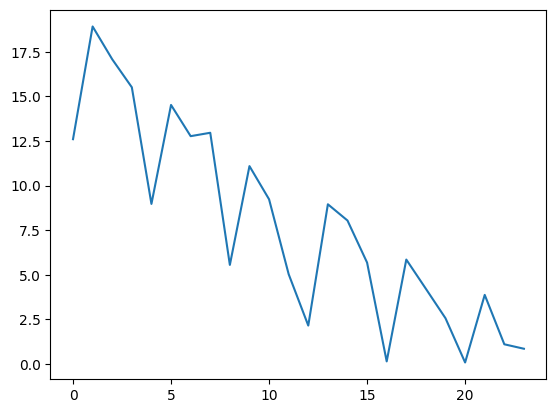

In [6]:
plt.plot(Y)

In [22]:
X = np.ones((len(Y), 2))
X[:, 1] = np.linspace(0, 10, len(Y))

In [23]:
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.43478261],
       [ 1.        ,  0.86956522],
       [ 1.        ,  1.30434783],
       [ 1.        ,  1.73913043],
       [ 1.        ,  2.17391304],
       [ 1.        ,  2.60869565],
       [ 1.        ,  3.04347826],
       [ 1.        ,  3.47826087],
       [ 1.        ,  3.91304348],
       [ 1.        ,  4.34782609],
       [ 1.        ,  4.7826087 ],
       [ 1.        ,  5.2173913 ],
       [ 1.        ,  5.65217391],
       [ 1.        ,  6.08695652],
       [ 1.        ,  6.52173913],
       [ 1.        ,  6.95652174],
       [ 1.        ,  7.39130435],
       [ 1.        ,  7.82608696],
       [ 1.        ,  8.26086957],
       [ 1.        ,  8.69565217],
       [ 1.        ,  9.13043478],
       [ 1.        ,  9.56521739],
       [ 1.        , 10.        ]])

In [32]:
B = np.linalg.lstsq(X,Y)


<ipython-input-32-ce03a15597ca>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = np.linalg.lstsq(X,Y)


[15.8088  -1.59751]


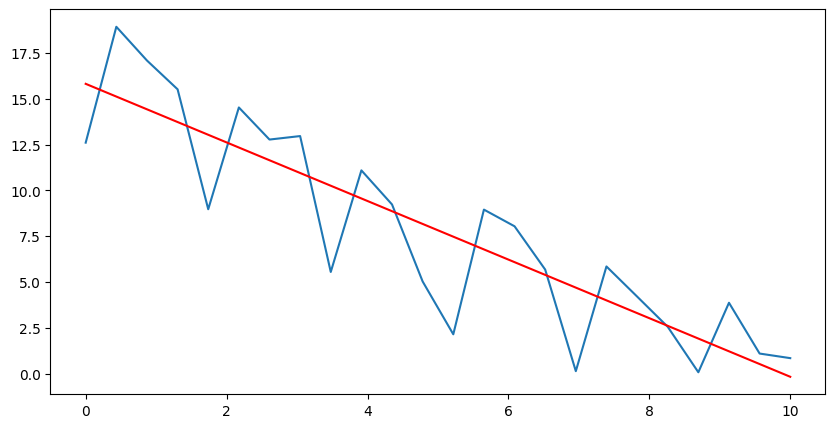

In [33]:
t = X[:, 1]
B = B[0] # забираем из результата коэффициенты β
print(B)
plt.figure(figsize = (10, 5))
plt.plot(t, Y) # строим исходный ВР
plt.plot(t, B[0] + B[1] * t , 'r') # строим его тренд
plt.show()


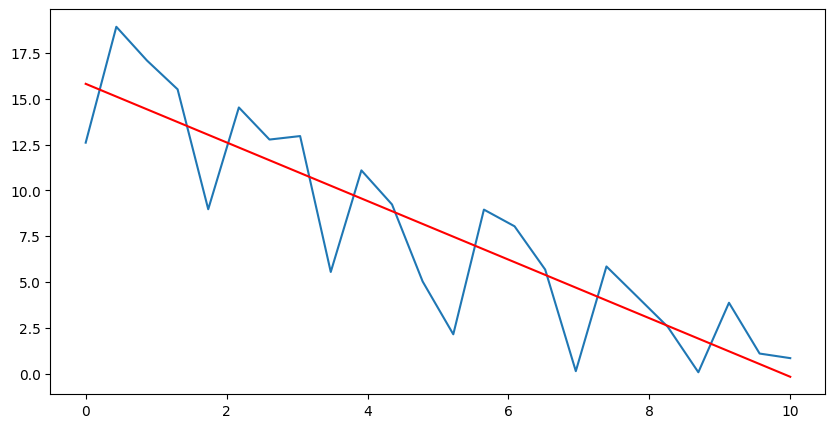

In [34]:
bb = np.polyfit(t, Y, 1) # полиномиальная кривая 1-го порядка
plt.figure(figsize = (10, 5))
plt.plot(t, Y)
plt.plot(t, bb[1] + bb[0]*t, 'r') # Внимание! Коэф. β в другом порядке
plt.show()


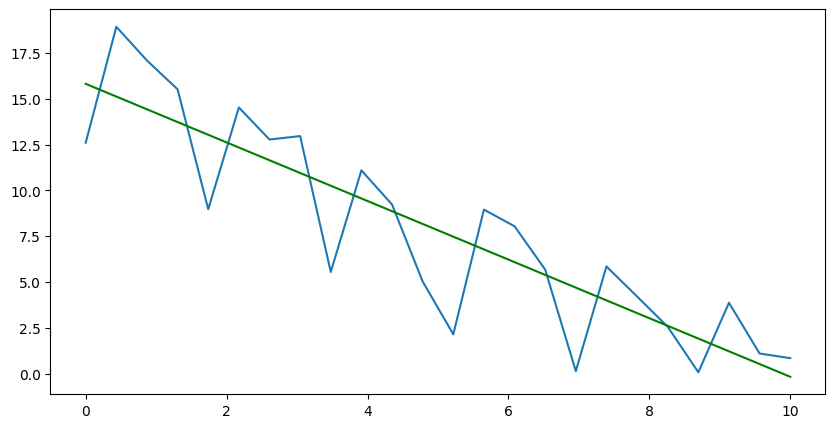

In [35]:
p = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(t, Y)
# считаем значения полинома на заданной временной сетке
plt.plot(t, p(t), 'g')
plt.show()

LinregressResult(slope=-1.5975099999999998, intercept=15.808799999999996, rvalue=-0.8750386453833794, pvalue=2.2183412022198143e-08, stderr=0.18840741244345044, intercept_stderr=1.0995307279619544)


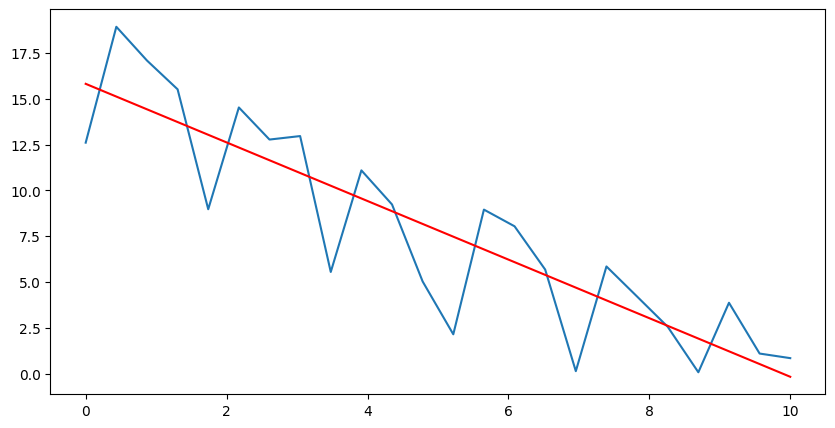

In [36]:
out = stats.linregress(t, Y)
print(out) # выведет все коэффициенты и статистику регрессии
plt.figure(figsize = (10, 5))
plt.plot(t, Y) # строим график кривой вместе с трендом
plt.plot(t, out.intercept + out.slope*t, 'r')
plt.show()

[15.80879998 -1.59750999]
[[ 1.20896781 -0.17748676]
 [-0.17748676  0.03549735]]


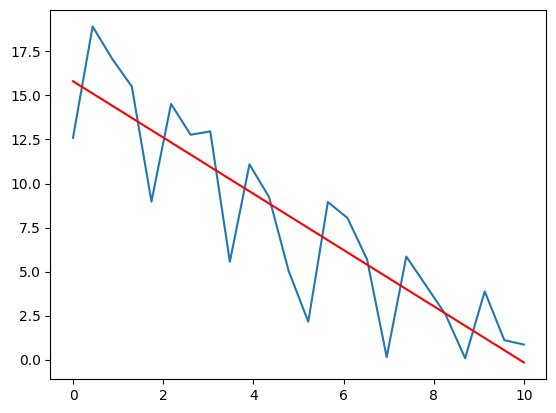

In [47]:
def func(t, b0, b1): # описываем функцию тренда
 return b0 + b1 * t # линейный тренд с 2 параметрами
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, t, Y) # проводим подгонку МНК

plt.plot(t, Y)
plt.plot(t, popt[1]*t + popt[0], c = 'red')

print(popt) # получаем коэффициенты b0 & b1
print(pcov) # ковариационная матрица ошибок подгонки


In [42]:
popt

array([15.80879998, -1.59750999])

In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(t.reshape(-1,1), Y)

plt.plot(t, Y)
plt.plot(t, reg/)

print(reg.coef_) # здесь выведется линейный коэффициент b1
print(reg.intercept_) # здесь выведется коэффициент b0 (смещение)
print(reg.score(t.reshape(-1,1), Y))
# здесь будет выведена «оценка» (равная R^2) полученной регрессии

[-1.59751]
15.808799999999994
0.7656926309143801


In [41]:
import statsmodels.api as sm
x_ = sm.add_constant(t.reshape(-1,1))
smm = sm.OLS(Y, x_) # используем Метод Наименьших Квадратов
# (МНК) (Ordinary Least Squares = OLS)
res = smm.fit() # подгоняем параметры модели по МНК
print(res.params) # получаем результирующие коэффициенты

[15.8088  -1.59751]
